## 1. Place Human, Furnitures in the Mujoco Simulator

In [2]:
import sys,mujoco,time,os,json
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../package/helper/')
sys.path.append('../package/mujoco_usage/')
sys.path.append('../package/gpt_usage/')
sys.path.append('../package/detection_module/')
from mujoco_parser import *
from utility import *
from transformation import *
from gpt_helper import *
from owlv2 import *
np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("Ready.")

Ready.


name:[SofaRoom] dt:[0.002] HZ:[500]
n_qpos:[2] n_qvel:[2] n_qacc:[2] n_ctrl:[2]

n_body:[9]
 [0/9] [world] mass:[0.00]kg
 [1/9] [obj_sofa] mass:[0.00]kg
 [2/9] [None] mass:[100.00]kg
 [3/9] [obj_woman] mass:[0.00]kg
 [4/9] [None] mass:[20.00]kg
 [5/9] [base_link] mass:[2.40]kg
 [6/9] [wheel_left_link] mass:[0.01]kg
 [7/9] [wheel_right_link] mass:[0.01]kg
 [8/9] [d435i] mass:[338208.46]kg
body_total_mass:[338330.88]kg

n_geom:[57]
geom_names:['floor', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]

n_joint:[2]
 [0/2] [wheel_left_joint] axis:[0. 0. 1.]
 [1/2] [wheel_right_joint] axis:[0. 0. 1.]

n_dof:[2] (=number of rows of Jacobian)
 [0/2] [None] attached joint:[wheel_left_joint] body:[wheel_left_link]

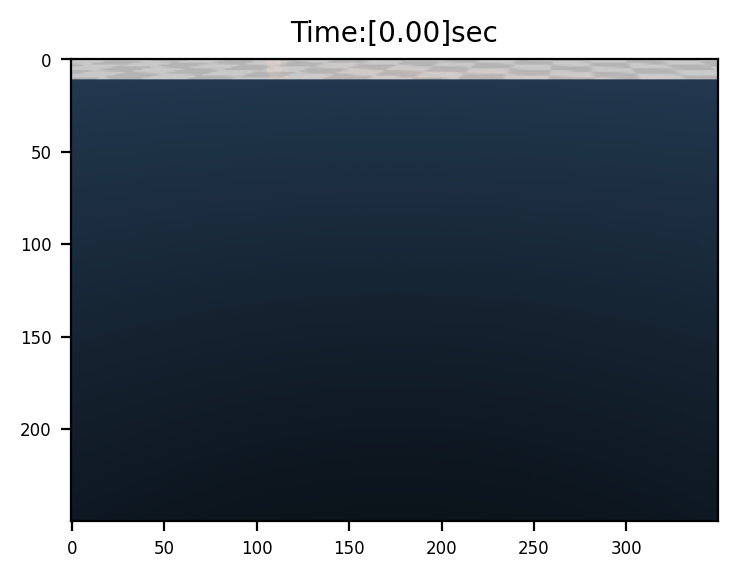

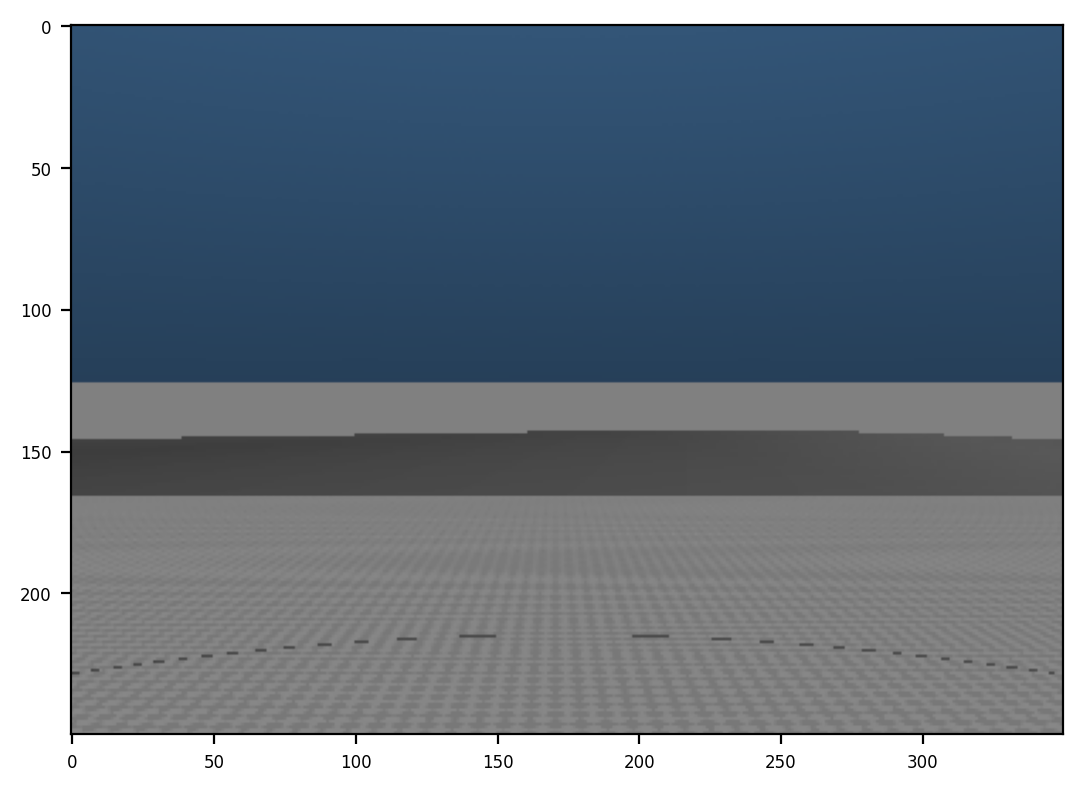

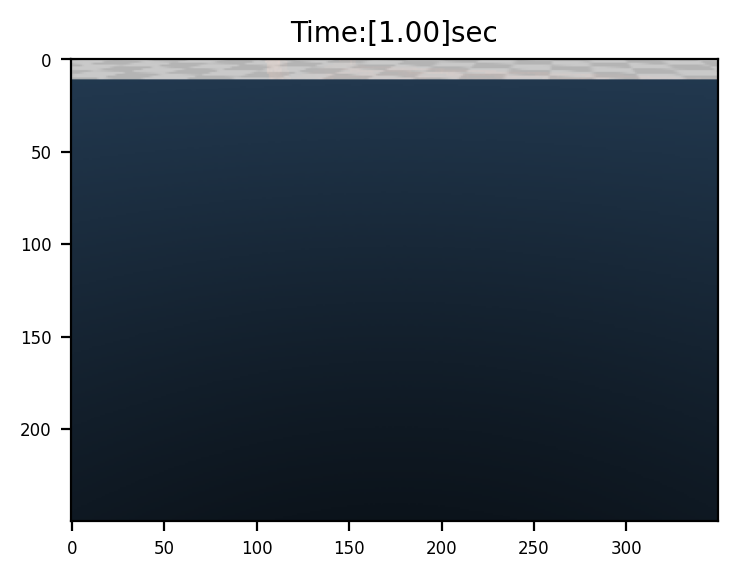

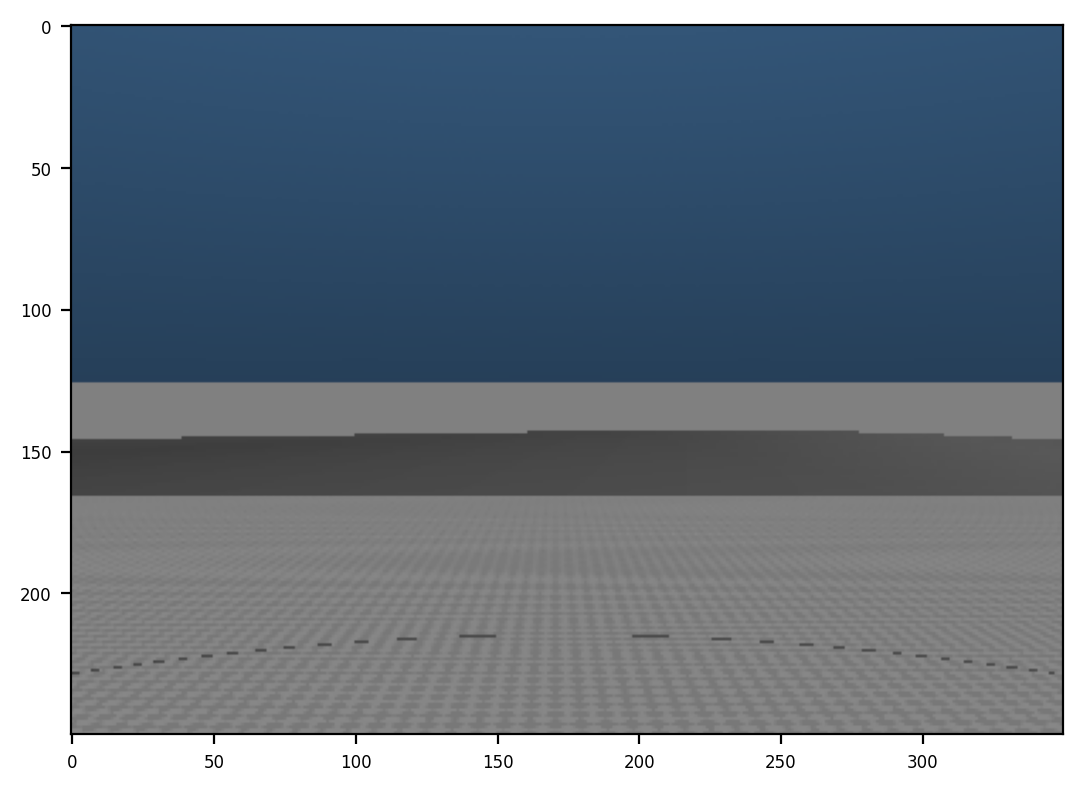

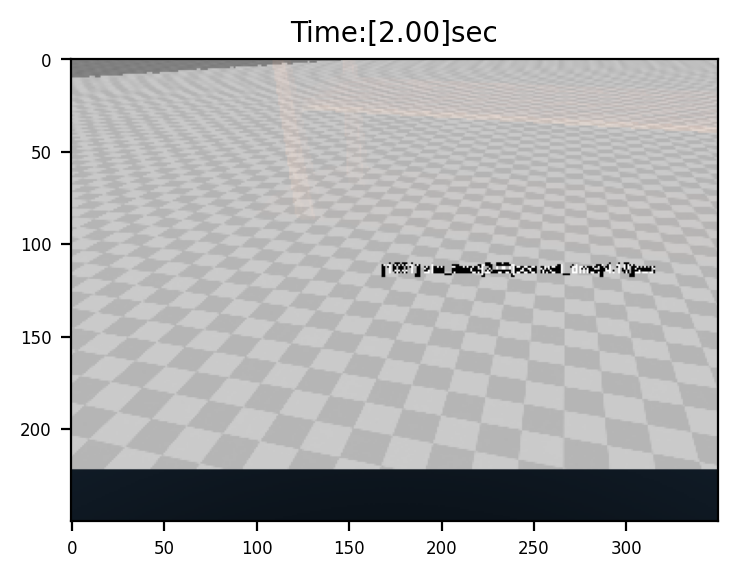

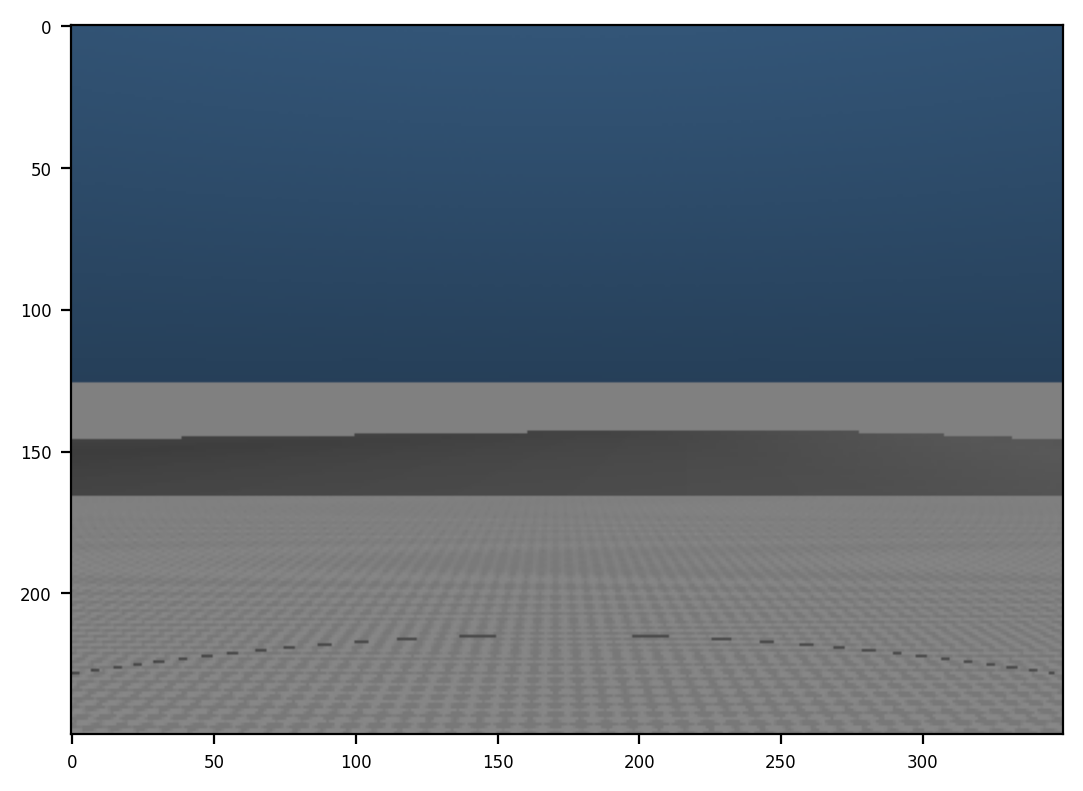

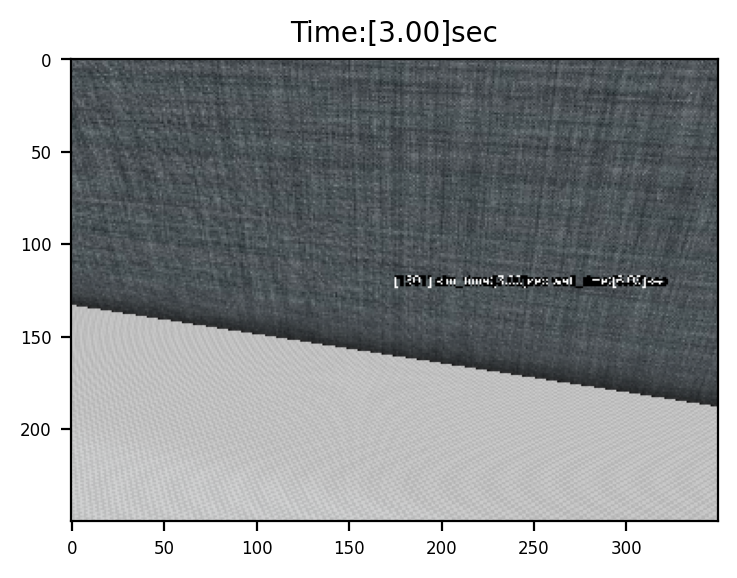

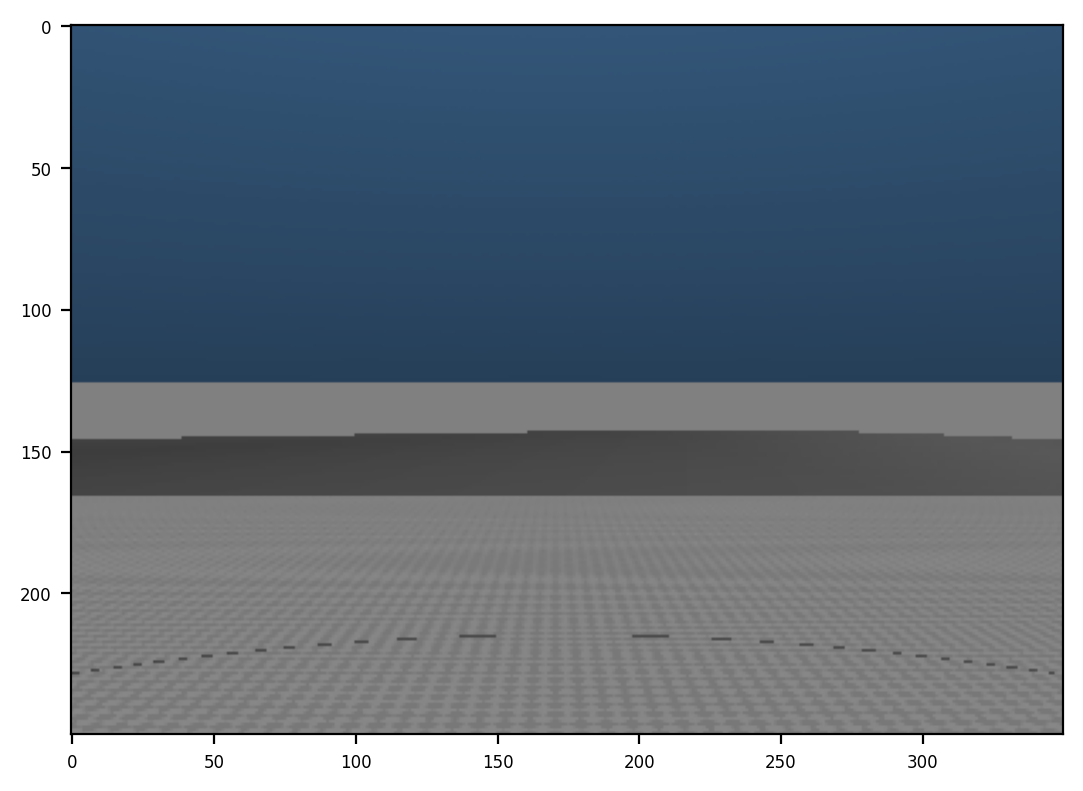

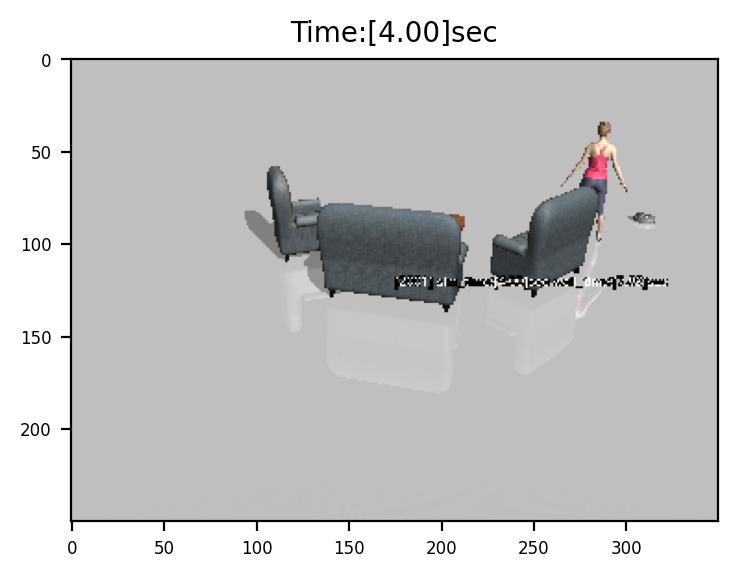

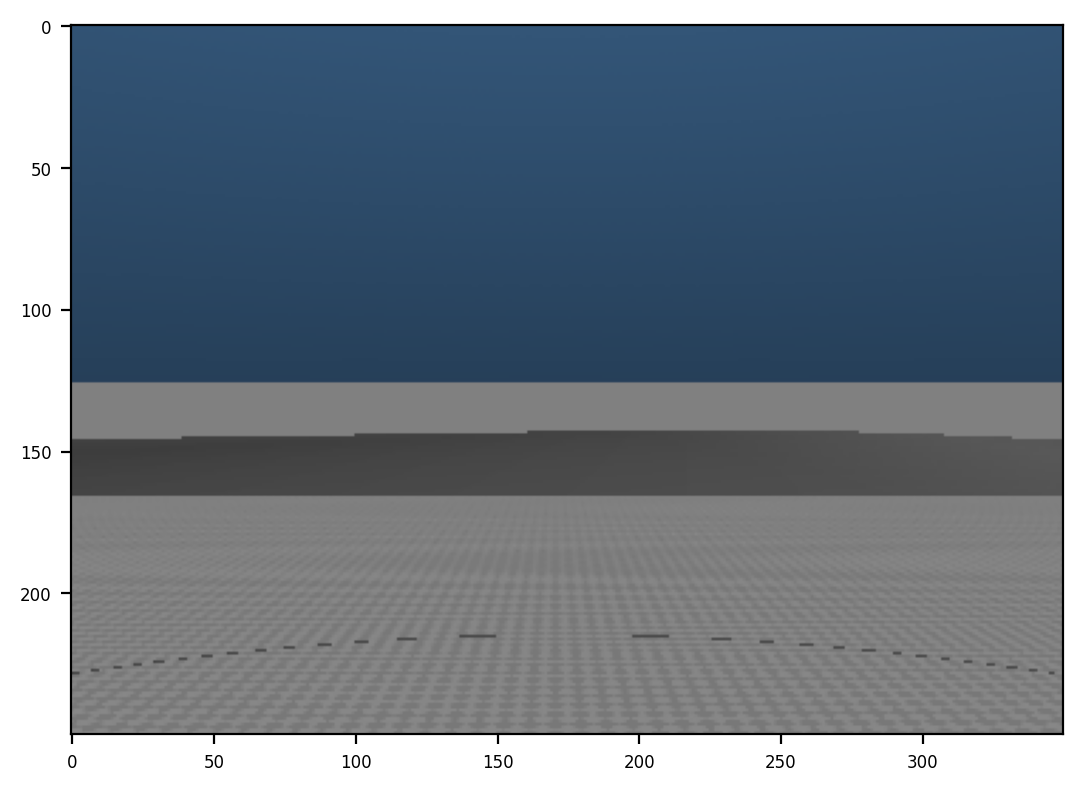

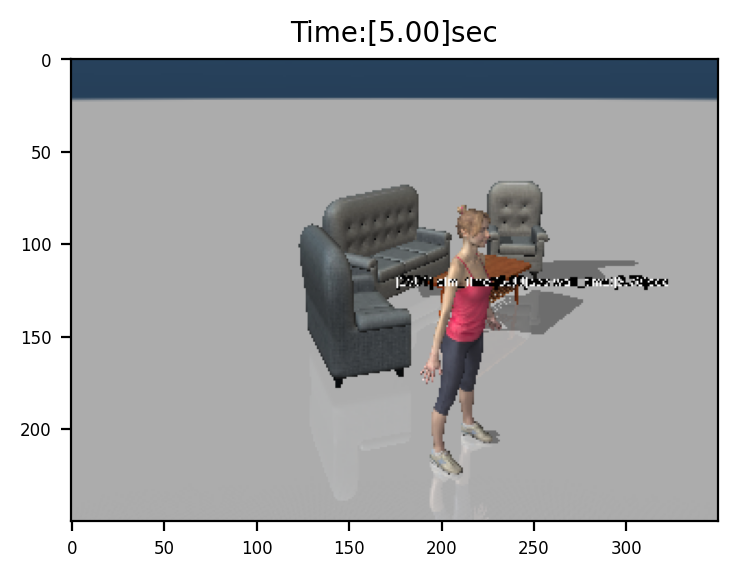

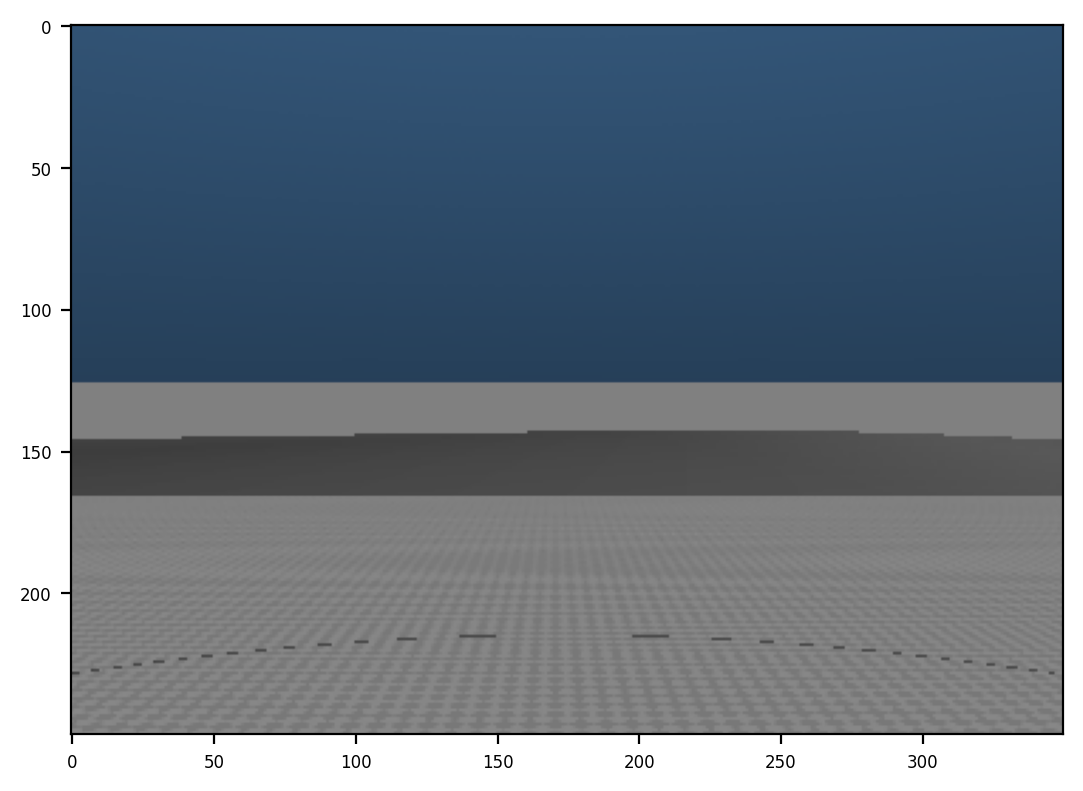

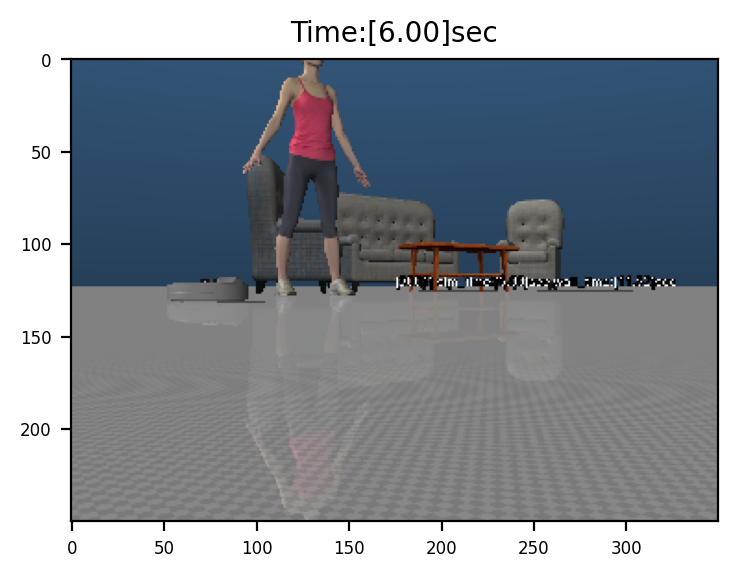

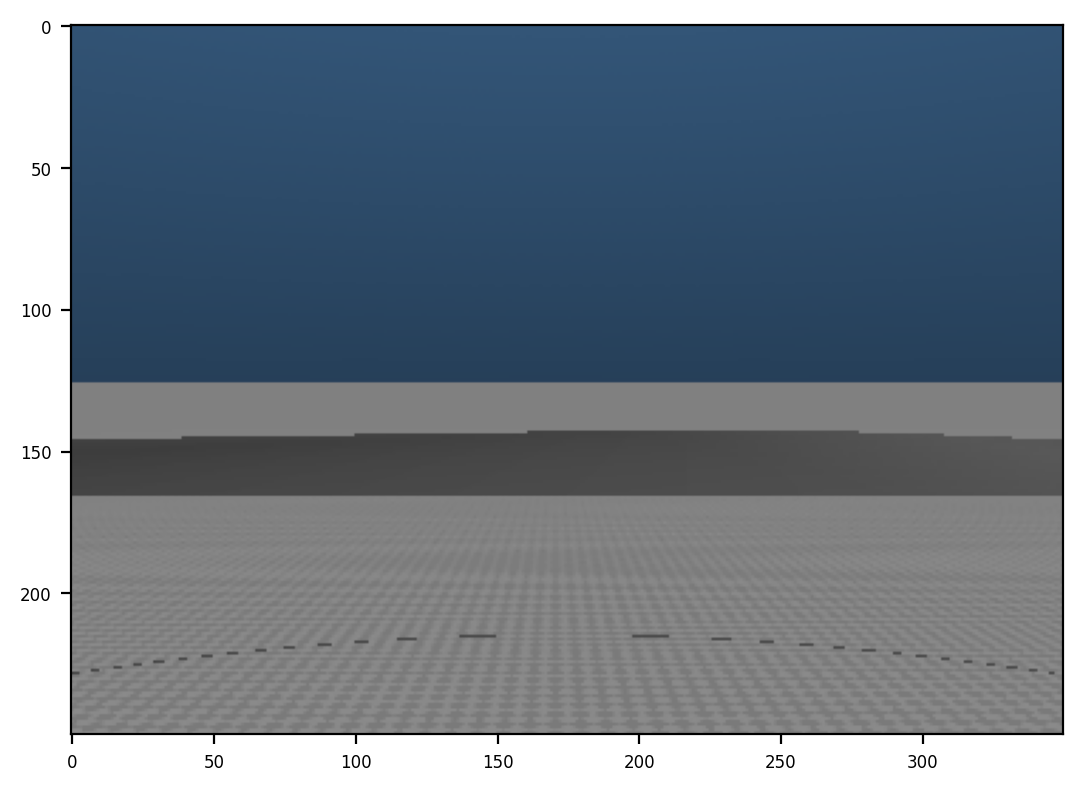

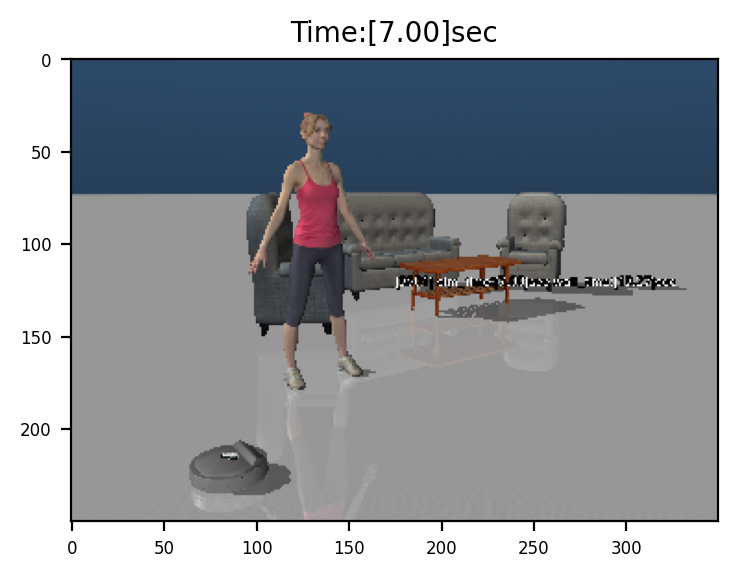

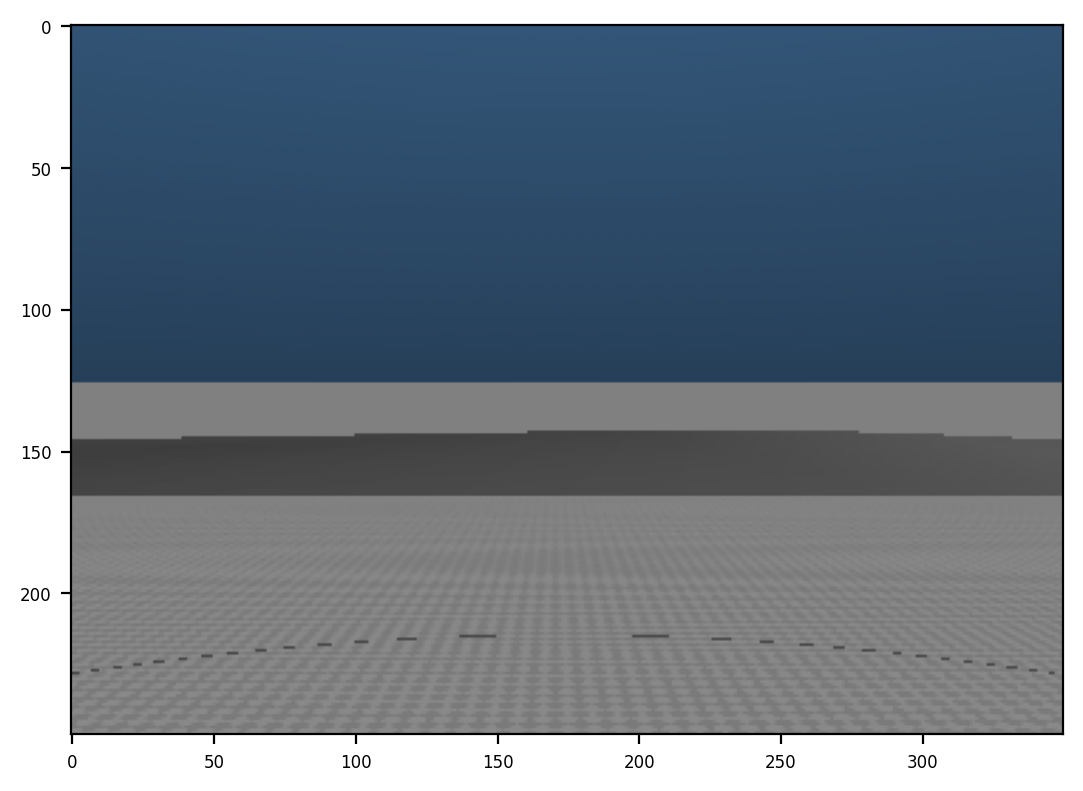

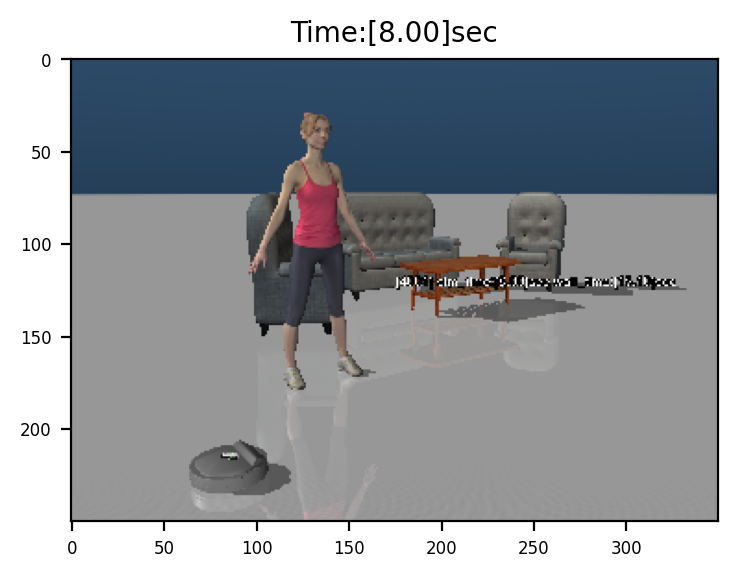

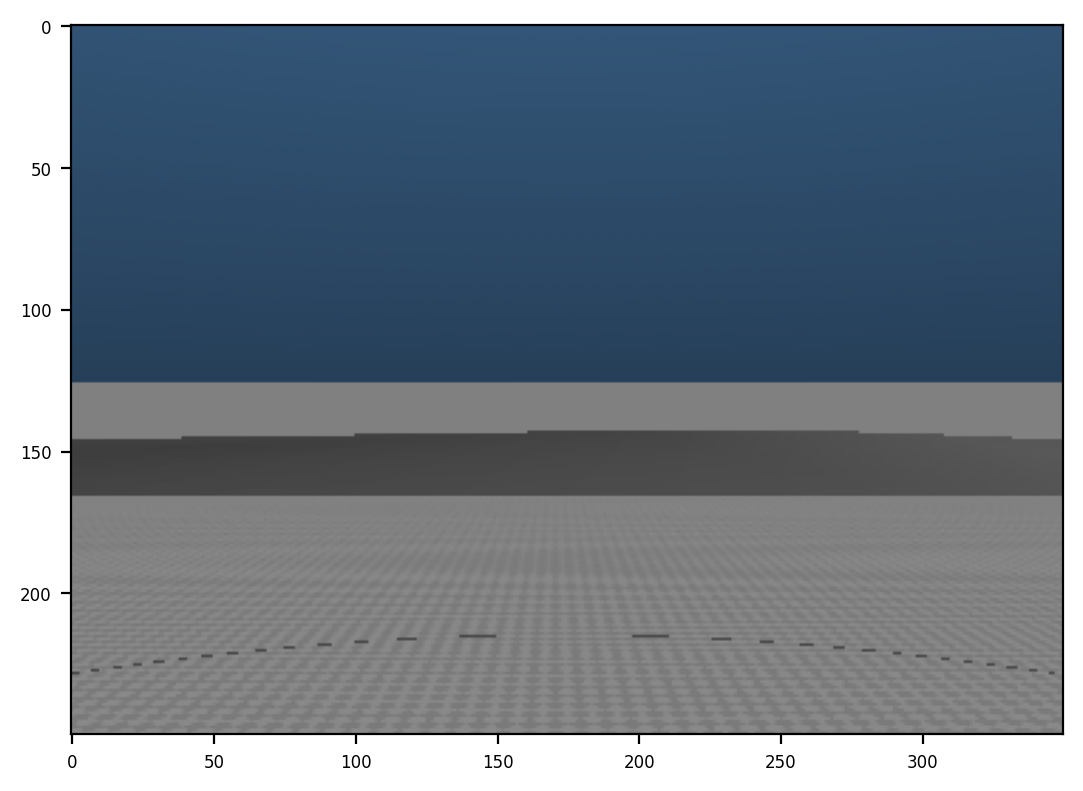

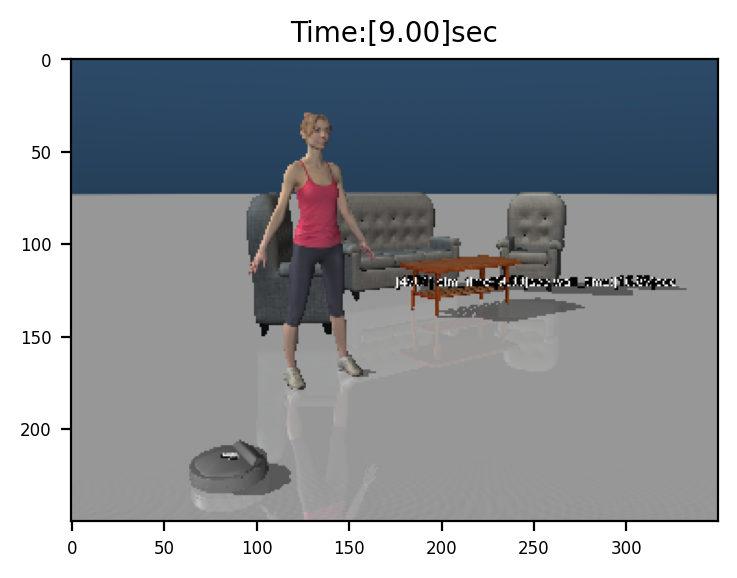

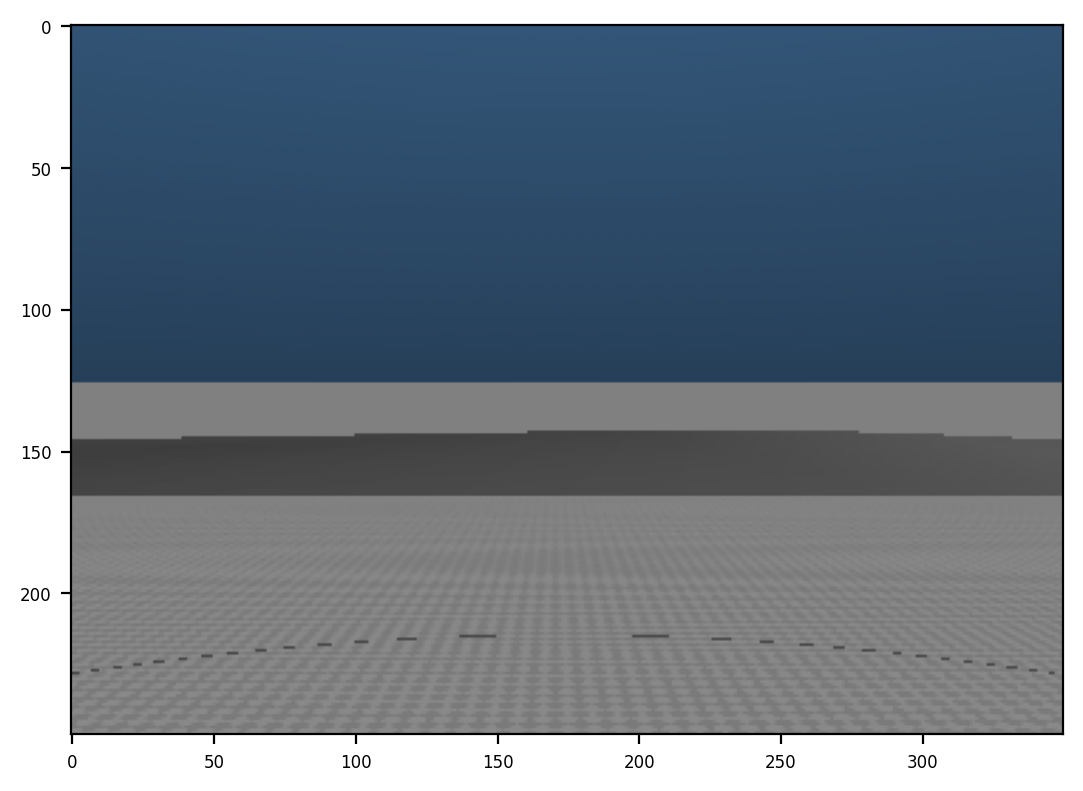

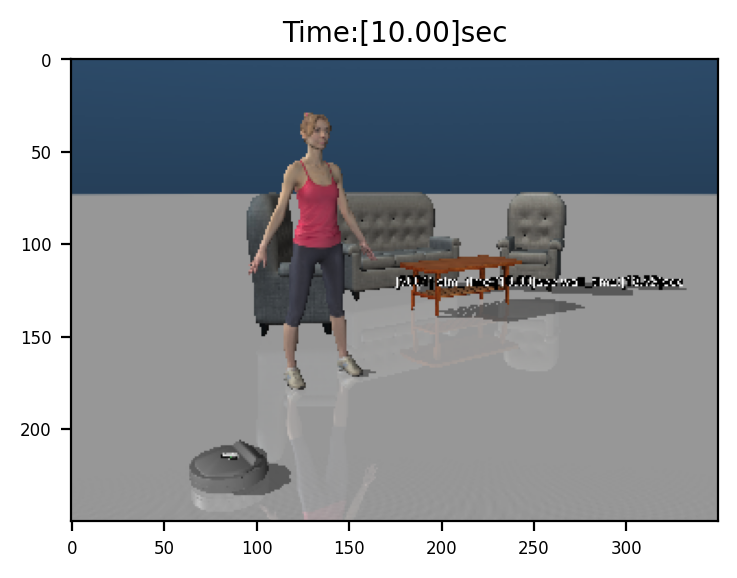

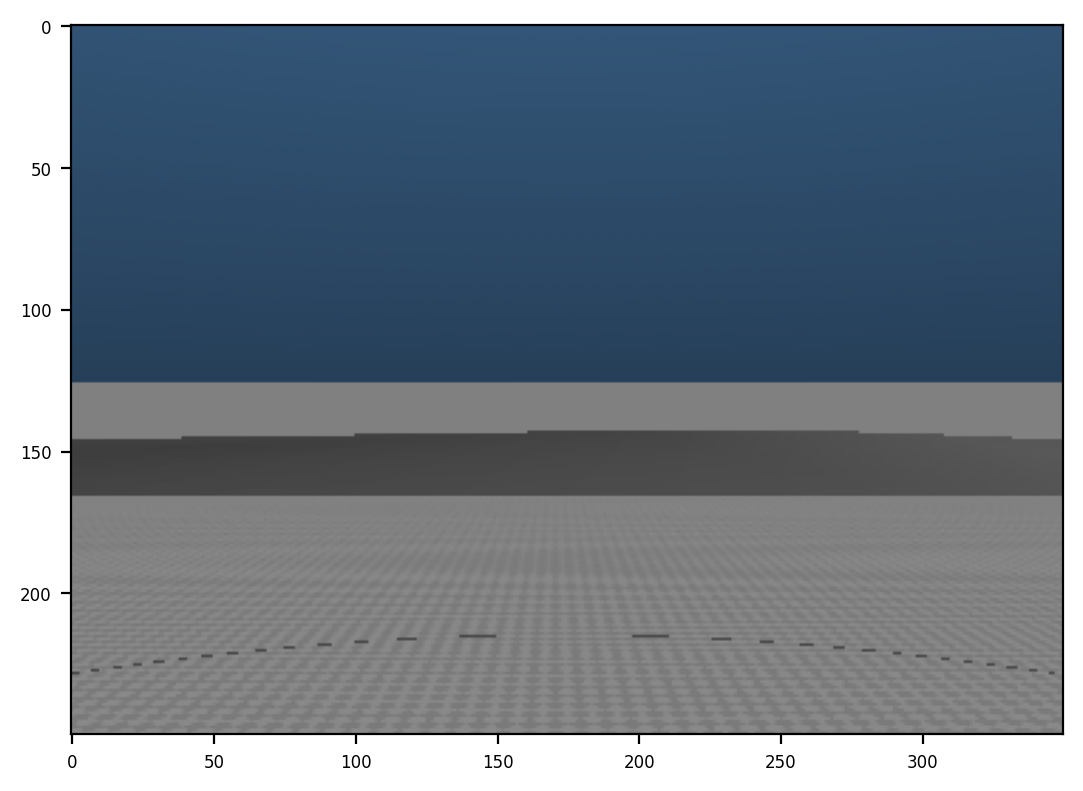

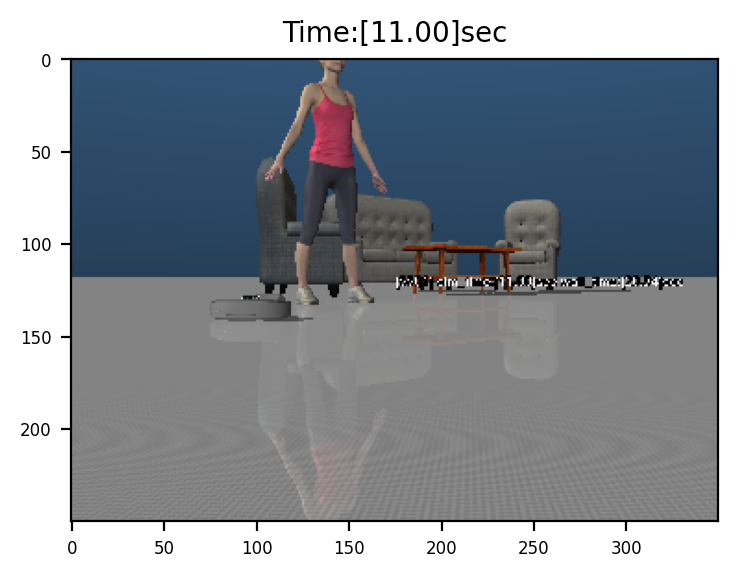

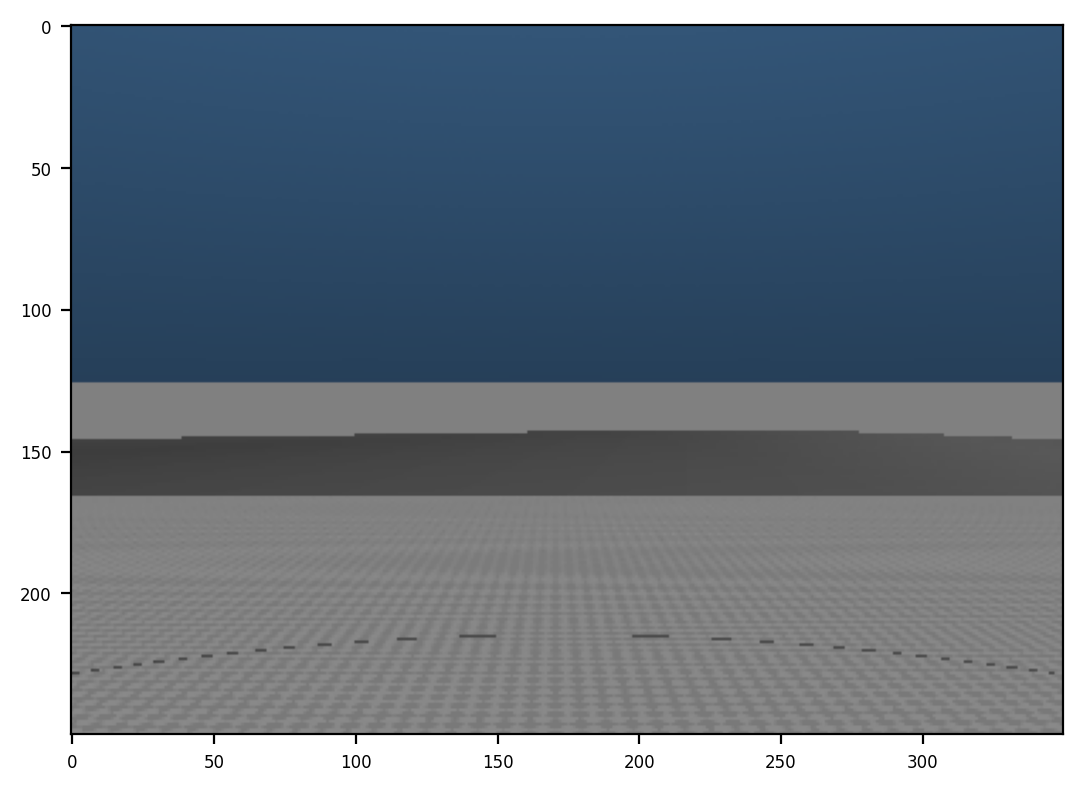

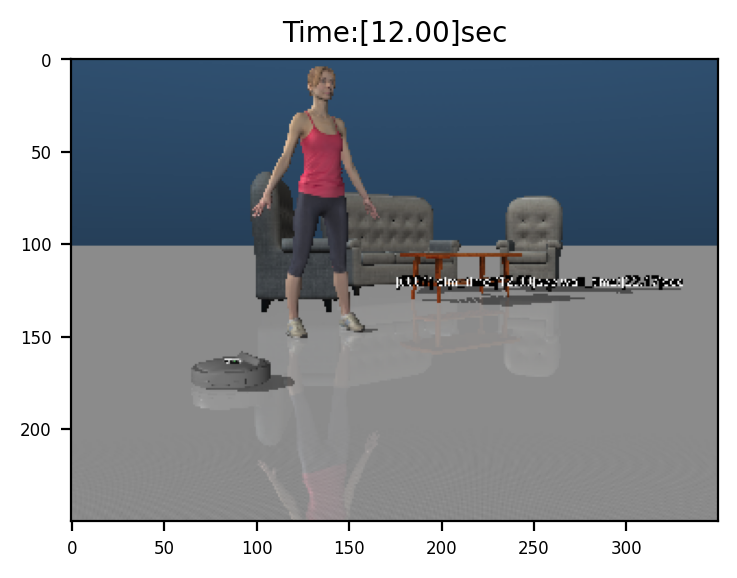

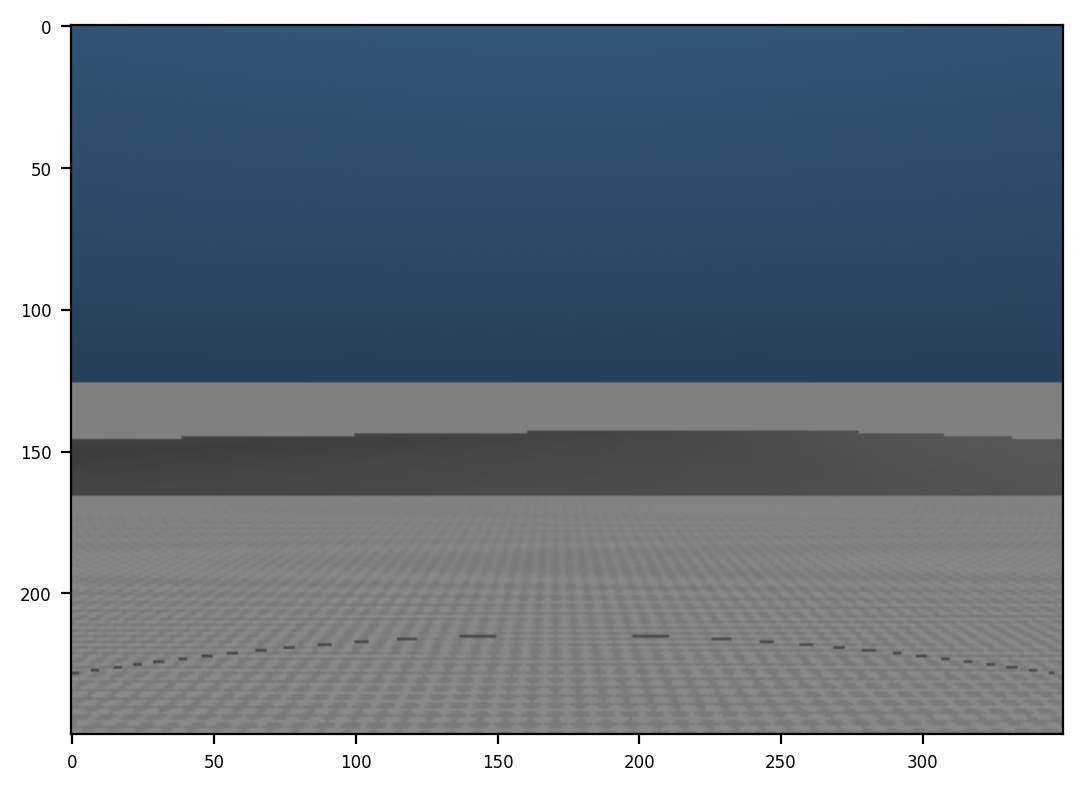

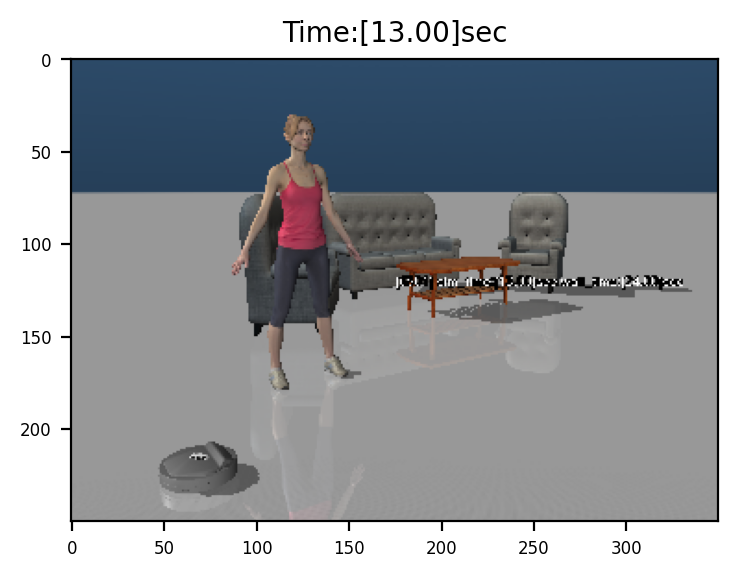

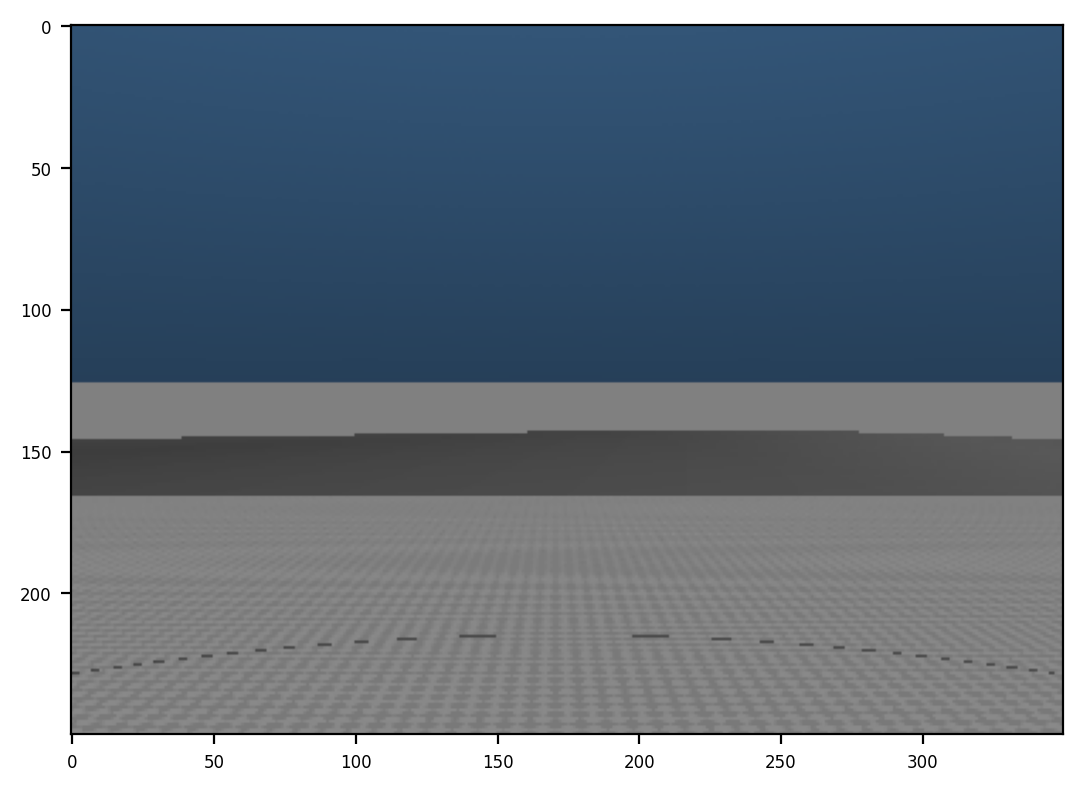

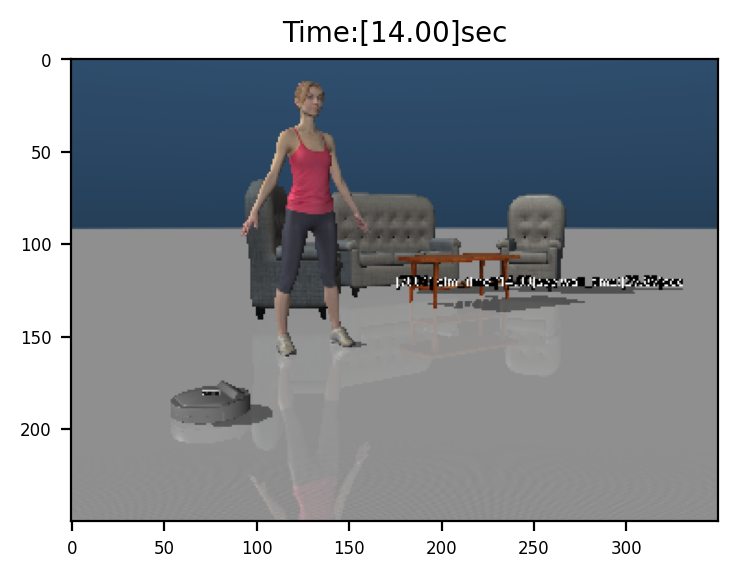

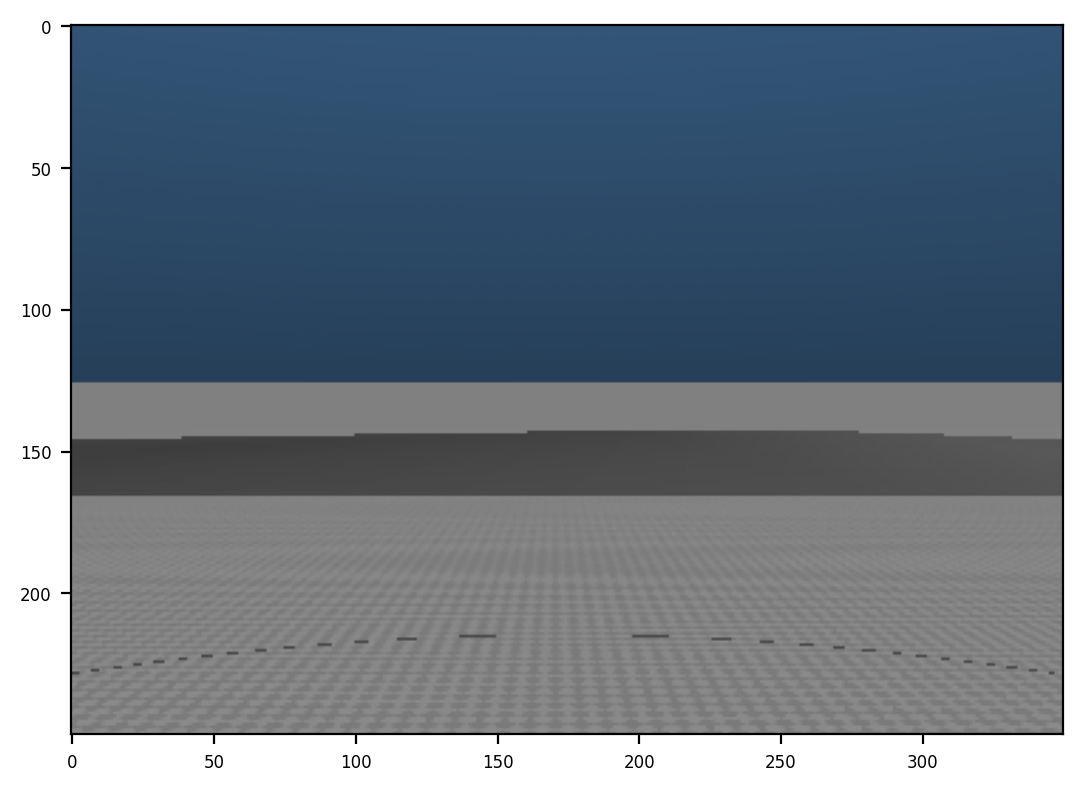

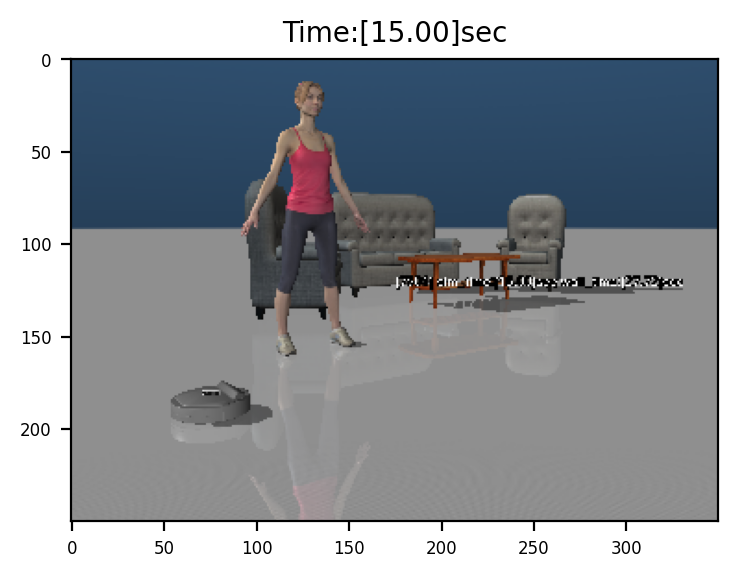

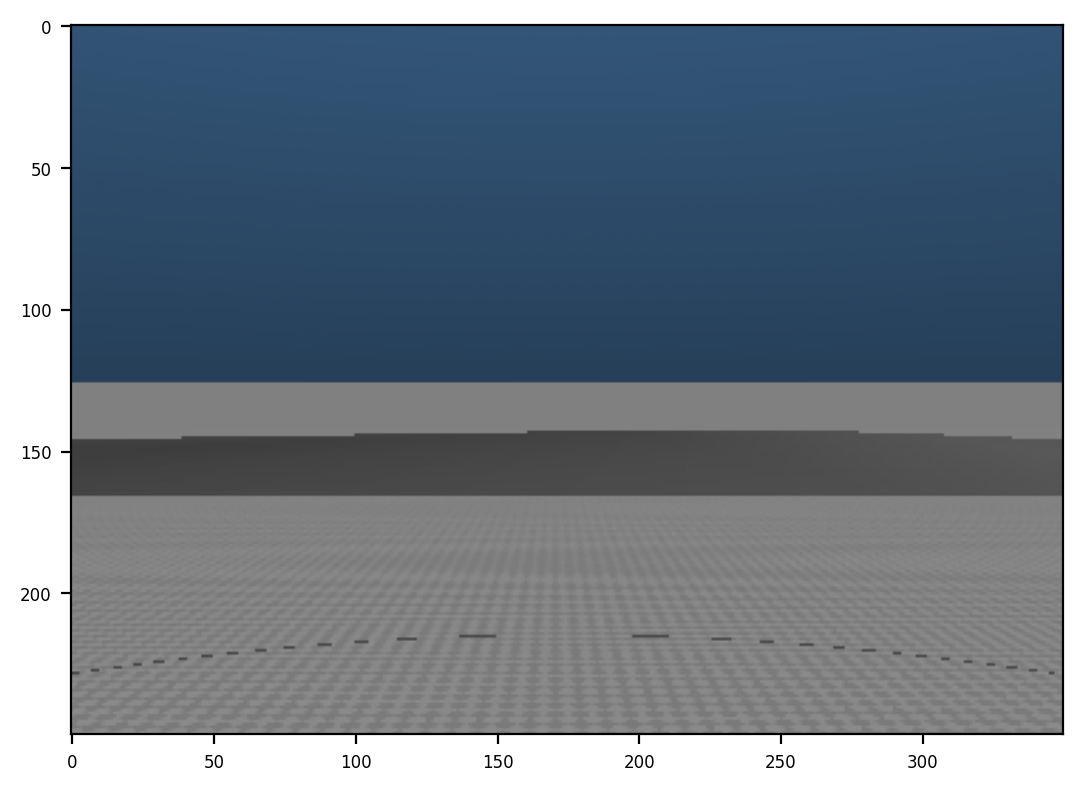

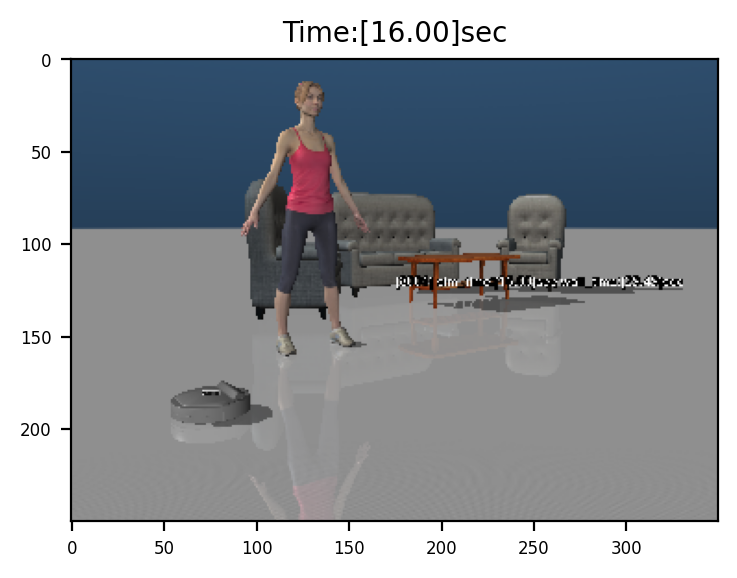

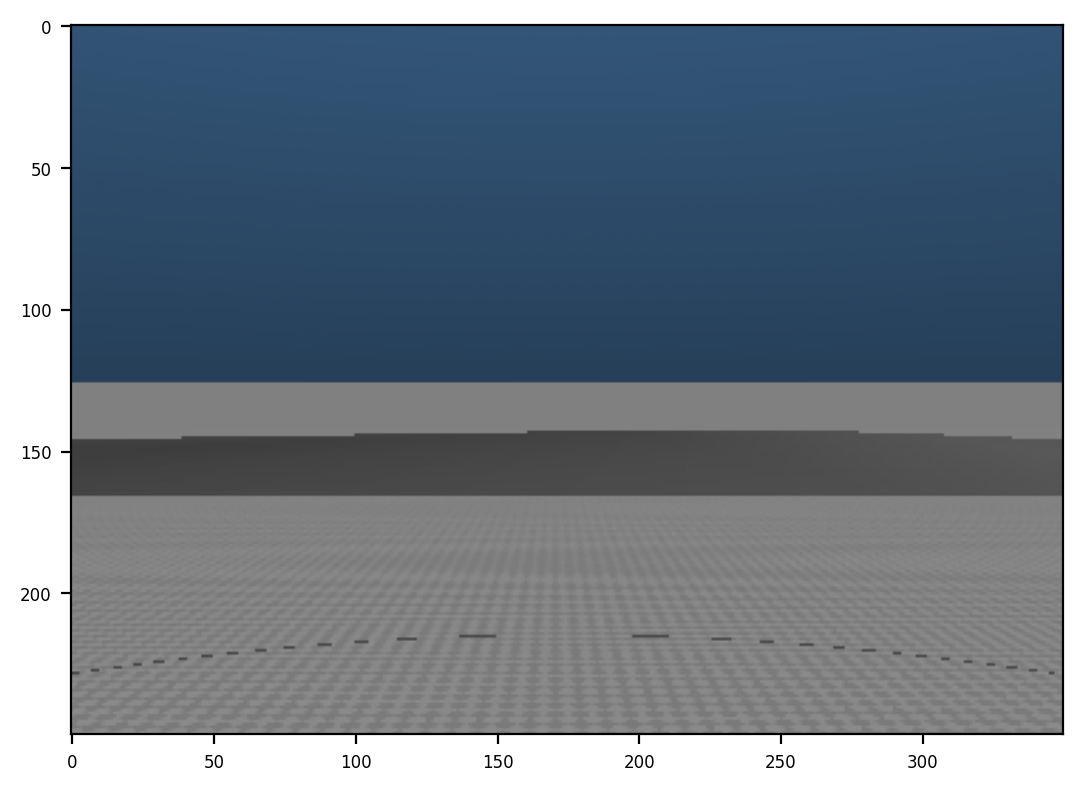

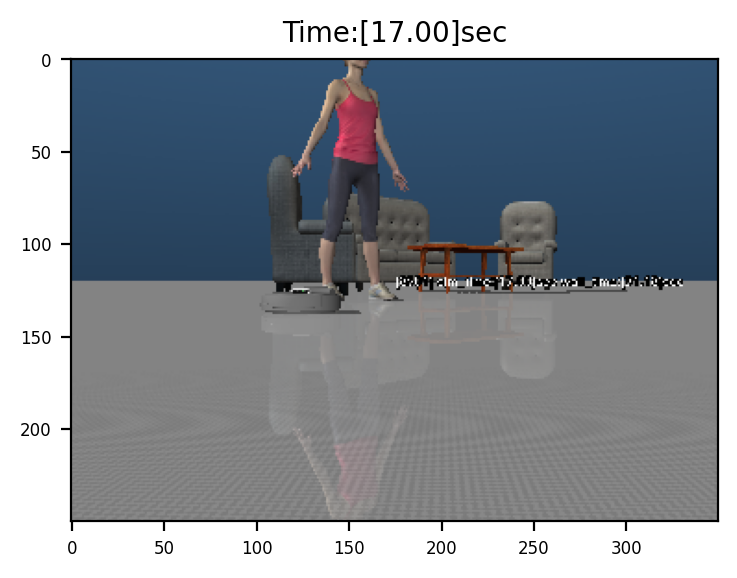

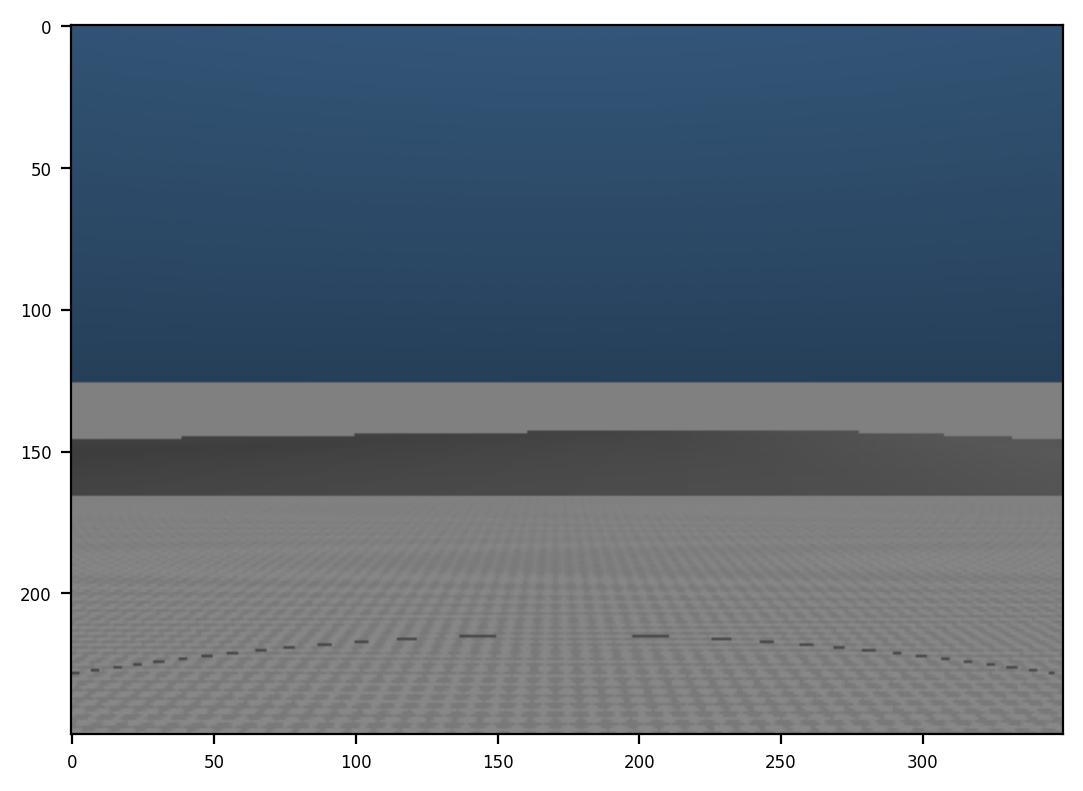

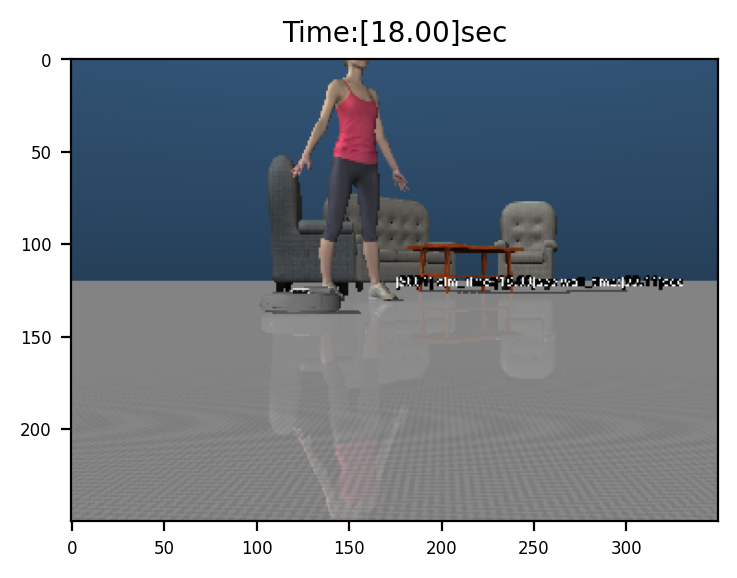

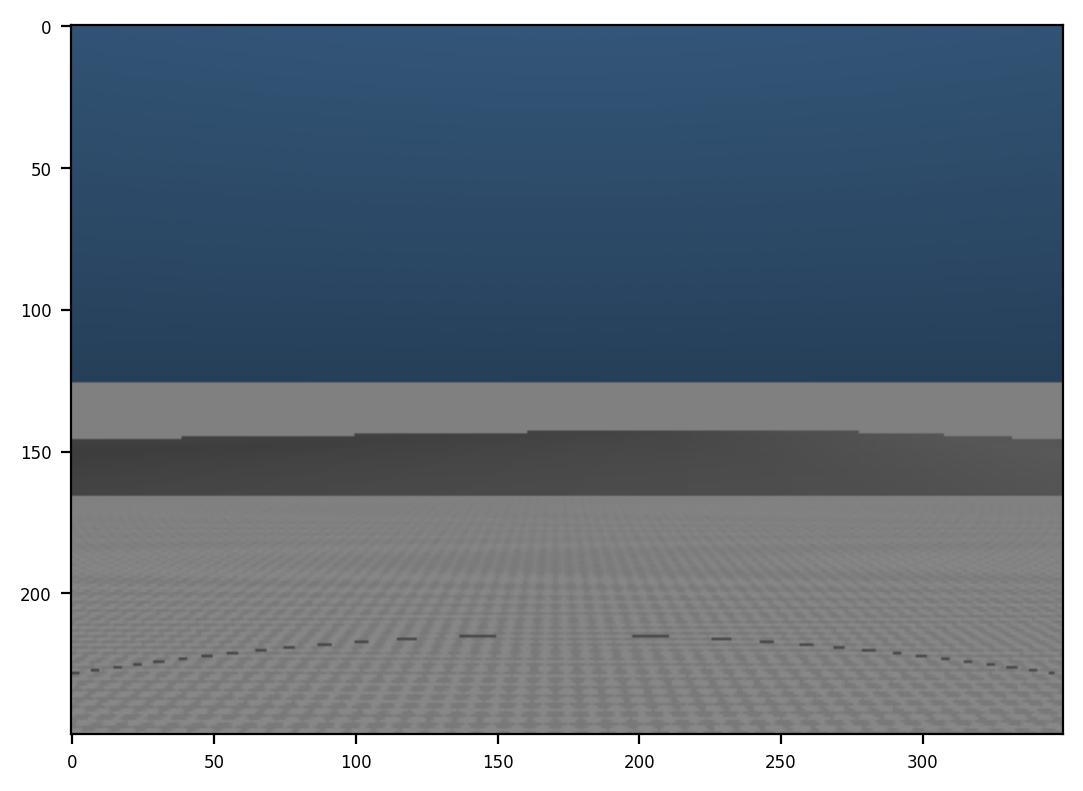

Done.


In [3]:
# Initialize environment
xml_path = '../asset/living_room/sofa_room.xml'
env = MuJoCoParserClass(name='SofaRoom', rel_xml_path=xml_path, verbose=True)
print("Done.")

# Initialize viewer
env.reset()
env.init_viewer(
    transparent=False,
    azimuth=105,
    distance=3.12,
    elevation=-29,
    lookat=[0.39, 0.25, 0.43],
)

# Get object names
obj_names = env.get_body_names(prefix='obj_')
n_obj = len(obj_names)
print("Object list:")
for obj_idx in range(n_obj):
    print(f" [{obj_idx}] obj_name:[{obj_names[obj_idx]}]")

# Main loop
env_state = env.get_state()
while env.is_viewer_alive():
    # Step
    env.step()
    
    # Render
    if env.loop_every(tick_every=10):
        env.plot_time()
        env.render()
    
    # Plot
    if env.loop_every(tick_every=500):  # every 1 second
        # Grab current view
        render_img = env.grab_image(rsz_rate=1/4)
        # Plot
        plt.figure(figsize=(8, 3))
        plt.imshow(render_img)
        plt.title(f"Time:[{env.get_sim_time():.2f}]sec", fontsize=10)
        plt.show()
        
        p_cam,R_cam = env.get_pR_body(body_name='d435i')
        p_ego  = p_cam
        p_trgt = p_cam + R_cam[:,2] # z-axis forward
        ego_rgb_img,ego_depth_img,pcd,xyz_img,xyz_img_world = env.get_egocentric_rgbd_pcd(
            p_ego            = p_ego,
            p_trgt           = p_trgt,
            rsz_rate_for_pcd = 1/20, # 1/4
            rsz_rate_for_img = 1/4,
            fovy             = 45, # env.model.cam_fovy[0]
            restore_view     = True,
        )
        # Plot
        plt.imshow(ego_rgb_img)
        plt.show()
        
env.close_viewer()
print ("Done.")
